In [10]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

Using TensorFlow backend.


In [11]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [12]:
def grab_image(img_path_base, index, numImages):
    #Desired image dimension (image will be square ie # by # pixels)
    imageDim = 100
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

#Num of images to read in
numImages = 600
X = np.concatenate([grab_image('/home/sdm2w/Pandemonium/miscImgs/',i, numImages) for i in range(numImages)]) 
X /= 255.0

X.shape

(600, 100, 100, 1)

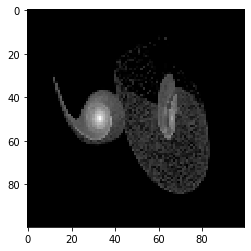

In [13]:
plt.imshow(image.array_to_img(X[45,:,:,:]), cmap='Greys_r')
plt.show()

In [14]:
Y = np.loadtxt('/home/sdm2w/Pandemonium/miscImgs/scores/humanScores.txt')
display(Y.shape)
display(Y[0:10])

(1294,)

array([0.945946, 0.941176, 0.918919, 0.916667, 0.916667, 0.914286,
       0.914286, 0.911765, 0.891892, 0.885714])

In [15]:
p = np.random.permutation(len(X))
Xshuffled = X[p]
Yshuffled = Y[p]

display(Xshuffled.shape)
display(Yshuffled.shape)

(600, 100, 100, 1)

(600,)

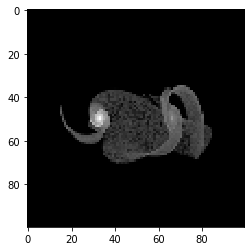

0.722222

In [16]:
plt.imshow(image.array_to_img(Xshuffled[0,:,:,:]), cmap='Greys_r')
plt.show()
display(Yshuffled[0])

In [17]:
x_train = Xshuffled[0:(round(numImages*.85)),:,:]
y_train = Yshuffled[0:(round(numImages*.85))]
x_test = Xshuffled[(round(numImages*.85)): , : , :]
y_test = Yshuffled[(round(numImages*.85)):]

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(510, 100, 100, 1)

(510,)

(90, 100, 100, 1)

(90,)

In [18]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(12, 12),
                activation='relu',
                input_shape=[x_test.shape[1],
                x_test.shape[2],
                x_test.shape[3]]))
model.add(keras.layers.Conv2D(16, kernel_size=(12, 12), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(8, kernel_size=(12, 12), activation='relu'))
#model.add(keras.layers.Conv2D(16, kernel_size=(12, 12), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
#model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 89, 89, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 78, 16)        36880     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           18440     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [19]:
batch_size = 4
epochs = 45
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split = 0.3)

Train on 357 samples, validate on 153 samples
Epoch 1/45
357/357 [==============================] - 17s 49ms/step - loss: 0.0629 - mse: 0.0629 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 2/45
357/357 [==============================] - 17s 47ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 3/45
357/357 [==============================] - 17s 46ms/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 4/45
357/357 [==============================] - 17s 47ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 5/45
357/357 [==============================] - 16s 46ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 6/45
357/357 [==============================] - 16s 46ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 7/45
357/357 [==============================] - 16s 45ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 8/45
357/3

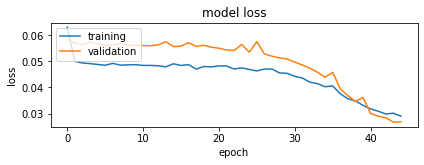

In [20]:
plt.figure()
# summarize history for accuracy
#plt.subplot(211)
#plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error'])
#plt.title('model mean_squared_error')
#plt.ylabel('mean_squared_error')
#plt.xlabel('epoch')
#plt.legend(['training', 'validation'], loc='upper left')
#* summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
preds = model.predict(x_test)
diff = preds.flatten() - (y_test)
print("Mean difference")
print("---------------")
display(np.mean(np.abs(diff)))

Mean difference
---------------


0.11636706301563052

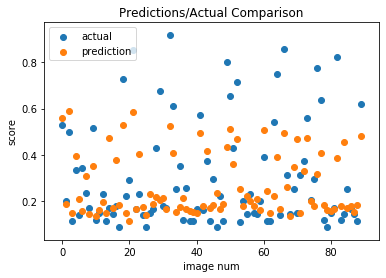

<Figure size 14400x1440 with 0 Axes>

In [22]:
#display(preds)
#display(y_test)
#display(diff)
shuffledInd = np.linspace(0,89,num = 90)

plt.figure()
plt.scatter(shuffledInd, y_test)
plt.scatter(shuffledInd, preds)
plt.title("Predictions/Actual Comparison")
plt.ylabel("score")
plt.xlabel("image num")
plt.legend(['actual', 'prediction'], loc='upper left')
#plt.subplot(212)
#plt.scatter(y_test, preds)
#plt.title("Predicted vs Actual value")
#plt.ylabel("predicted value")
#plt.xlabel("actual value")
plt.figure(figsize=(200,20))
plt.show()

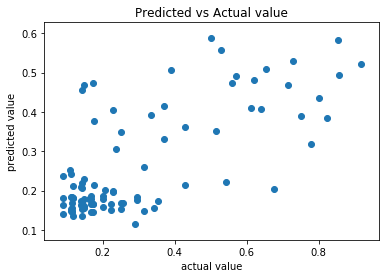

In [23]:
plt.figure()
plt.scatter(y_test, preds)
plt.title("Predicted vs Actual value")
plt.ylabel("predicted value")
plt.xlabel("actual value")
plt.show()

In [24]:
display(preds)

array([[0.558326  ],
       [0.18578765],
       [0.5887819 ],
       [0.14621659],
       [0.39311203],
       [0.209146  ],
       [0.15565833],
       [0.30664593],
       [0.14535707],
       [0.35144535],
       [0.13505876],
       [0.16110815],
       [0.19643714],
       [0.14776978],
       [0.47411555],
       [0.17118025],
       [0.37671885],
       [0.18173297],
       [0.52883106],
       [0.14975156],
       [0.11353381],
       [0.5830225 ],
       [0.16548958],
       [0.40525416],
       [0.17338046],
       [0.14096501],
       [0.23003007],
       [0.18479852],
       [0.21511471],
       [0.20452729],
       [0.21454608],
       [0.1663649 ],
       [0.5225437 ],
       [0.4091314 ],
       [0.15394524],
       [0.17309144],
       [0.21125272],
       [0.16707511],
       [0.15655729],
       [0.15176949],
       [0.14563075],
       [0.49250284],
       [0.17794785],
       [0.41503748],
       [0.1683495 ],
       [0.18244271],
       [0.23614375],
       [0.165

In [25]:
preds.size

90

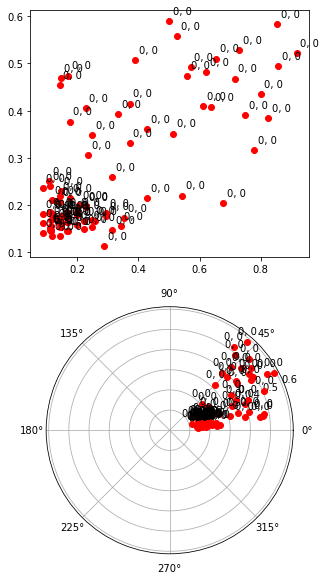

In [26]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np


xs = y_test
ys = preds

fig = plt.figure(figsize=(5, 10))
ax = plt.subplot(2, 1, 1)

# If we want the same offset for each text instance,
# we only need to make one transform.  To get the
# transform argument to offset_copy, we need to make the axes
# first; the subplot command above is one way to do this.
trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       x=0.05, y=0.10, units='inches')

for x, y in zip(xs, ys):
    plt.plot(x, y, 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)), transform=trans_offset)


# offset_copy works for polar plots also.
ax = plt.subplot(2, 1, 2, projection='polar')

trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       y=6, units='dots')

for x, y in zip(xs, ys):
    plt.polar(x, y, 'ro')
    plt.text(x, y, '%d, %d' % (int(x), int(y)),
             transform=trans_offset,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

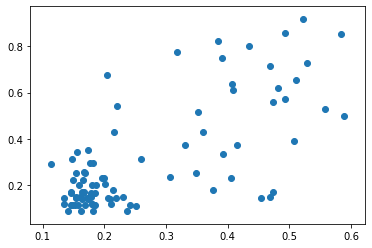

In [27]:
plt.scatter(preds, y_test )

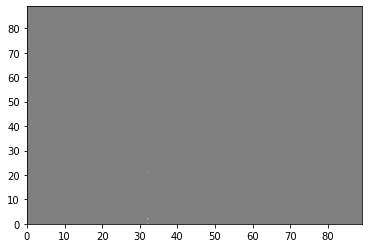

In [234]:
x = preds
y = y_test
h = x*y

cs = plt.contourf(h, levels=[0, .5, 100],
    colors=['#808080', '#A0A0A0', '#000000'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


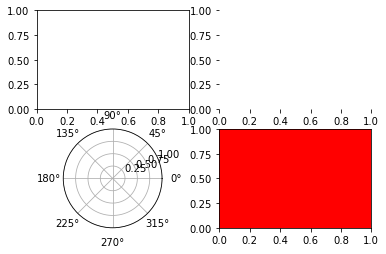

In [29]:
# plot a line, implicitly creating a subplot(111)
plt.plot([1, 2, 3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

In [30]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

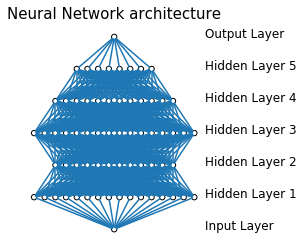

In [31]:
DrawNN( [1,16,12,16,12,8,1] ).draw()

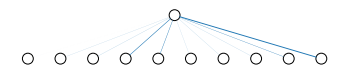

In [235]:
from matplotlib import pyplot
from math import cos, sin, atan
import numpy as np


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, weights):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.weights = weights

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, linewidth):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line_x_data = (neuron1.x - x_adjustment, neuron2.x + x_adjustment)
        line_y_data = (neuron1.y - y_adjustment, neuron2.y + y_adjustment)
        line = pyplot.Line2D(line_x_data, line_y_data, linewidth=linewidth)
        pyplot.gca().add_line(line)

    def draw(self):
        for this_layer_neuron_index in range(len(self.neurons)):
            neuron = self.neurons[this_layer_neuron_index]
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron_index in range(len(self.previous_layer.neurons)):
                    previous_layer_neuron = self.previous_layer.neurons[previous_layer_neuron_index]
                    weight = self.previous_layer.weights[this_layer_neuron_index, previous_layer_neuron_index]
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weight)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons, weights=None):
        layer = Layer(self, number_of_neurons, weights)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.show()



if __name__ == "__main__":
    vertical_distance_between_layers = 4
    horizontal_distance_between_neurons = 3
    neuron_radius = 0.5
    number_of_neurons_in_widest_layer = 4
    network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
    
    
    weights1 = 10*np.array([\
                         [0.00016285,  0.00760371,  0.01031382,  0.05491021,
         -0.0376443,  0.007211, -0.00871943,  0.00902244,
          0.02815584,  0.09385214]])
    network.add_layer(10, weights1)
    network.add_layer(1)
    network.draw()

In [186]:
i=0
for i in range(8):
    weights = model.get_weights()[i]
    print(weights.shape)

(12, 12, 1, 16)
(16,)
(12, 12, 16, 16)
(16,)
(12, 12, 16, 8)
(8,)
(512, 1)
(1,)


In [34]:
weights.size

2304

In [35]:
weights[0,2,0,0]

-0.01408133

In [37]:
import numpy as np
a = [] # declare null array
a.append([1,2,3]) # append elements
a.append([4,5,6])
a.append([7,8,9])
print(a)
a_np = np.asarray(a) # convert to numpy array
print(a_np[2,2])

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
9


In [90]:

pArr=[]
layer_len = 12
i=0
j=0
for j in range(12):
    new = 0
    iArr=[]
    for k in range(16):
        for i in range(layer_len):
            new = new + weights[0,i,0,j]
            #print("-----> ")
            #print(weights[0,i,0,0])
        
        #Multiplied by scalar to draw more distinctly
        new = (new /12) *10
        iArr.append(new)
        i=i+1
    pArr.append(iArr)
    
# Display the array
# Should contain 12 separate nodes (local input) each containing 16 weights (local output)
pArr


[[-0.249442770339859,
  -0.45731174562307486,
  -0.6305358916924214,
  -0.7748893467502103,
  -0.8951838926317008,
  -0.995429347532943,
  -1.0789672266173116,
  -1.1485821258542854,
  -1.206594541885097,
  -1.2549382219107732,
  -1.29522462193217,
  -1.3287966219500005,
  -1.3567732886315262,
  -1.3800871775327974,
  -1.3995154182838567,
  -1.4157056189097397],
 [-0.22122425065996748,
  -0.405577792876607,
  -0.5592057447238066,
  -0.6872290379298063,
  -0.7939151156014728,
  -0.8828201803278614,
  -0.9569077342665184,
  -1.018647362548733,
  -1.0700970527839115,
  -1.1129717946465605,
  -1.148700746198768,
  -1.178474872492274,
  -1.203286644403529,
  -1.2239631209962416,
  -1.2411935181568354,
  -1.2555521824573304],
 [-0.1647994954449435,
  -0.30213240831572974,
  -0.4165765023747183,
  -0.5119465807572088,
  -0.5914216460759508,
  -0.6576508671749025,
  -0.7128418847573623,
  -0.7588343994094121,
  -0.797161494952787,
  -0.8291007412389327,
  -0.8557167798107208,
  -0.877896811953

In [39]:
weights[0,0,0,0]

-0.023762478

In [188]:
wt = np.array([pArr[8]]) 

wt


array([[-0.14648962, -0.26856431, -0.37029322, -0.45506731, -0.52571238,
        -0.58458328, -0.63364235, -0.67452492, -0.70859373, -0.7369844 ,
        -0.76064329, -0.78035903, -0.79678882, -0.81048031, -0.82188988,
        -0.83139786]])

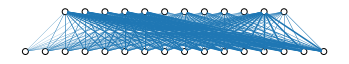

In [175]:

if __name__ == "__main__":
    vertical_distance_between_layers = 10
    horizontal_distance_between_neurons = 5
    neuron_radius = .75
    number_of_neurons_in_widest_layer = 4
    network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
    weights1 = np.array(pArr)
    network.add_layer(16, weights1)
    network.add_layer(12)
    network.draw()

In [72]:
np.array([\
                         [0.02016285,  0.00760371,  0.01031382,  0.05491021,
         -0.0376443,  0.007211, -0.00871943,  0.00902244,
          0.02815584,  0.00385214],\
                         [0.04735465,  0.04930427,  0.0480461 , -0.00236453,
         -0.03392267,  0.01320707,  0.06011211, -0.05627991,
         -0.03935345, -0.07184758],\
                         [-0.04479741,  0.02164986,  0.0321383 , -0.00559891,
          0.02876161, -0.04202317,  0.03172047, -0.07199544,
         -0.04810658, -0.00620234],\
                         [-0.00468566,  0.06216215, -0.01728918,  0.06474513,
         -0.01829397, -0.01767695,  0.01843502, -0.00562901,
         -0.02015013,  0.01926117]])

array([[ 0.02016285,  0.00760371,  0.01031382,  0.05491021, -0.0376443 ,
         0.007211  , -0.00871943,  0.00902244,  0.02815584,  0.00385214],
       [ 0.04735465,  0.04930427,  0.0480461 , -0.00236453, -0.03392267,
         0.01320707,  0.06011211, -0.05627991, -0.03935345, -0.07184758],
       [-0.04479741,  0.02164986,  0.0321383 , -0.00559891,  0.02876161,
        -0.04202317,  0.03172047, -0.07199544, -0.04810658, -0.00620234],
       [-0.00468566,  0.06216215, -0.01728918,  0.06474513, -0.01829397,
        -0.01767695,  0.01843502, -0.00562901, -0.02015013,  0.01926117]])

Node 1  -- Mean Weight (standardized):  1.0542486161298603   -  ( Total weight:  16.867977858077765 )


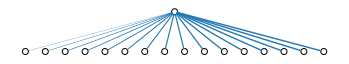

___________________________________________________________


Node 2  -- Mean Weight (standardized):  0.934985446941889   -  ( Total weight:  14.959767151070224 )


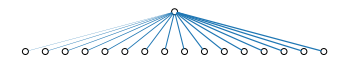

___________________________________________________________


Node 3  -- Mean Weight (standardized):  0.6965110264571526   -  ( Total weight:  11.144176423314441 )


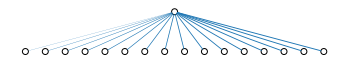

___________________________________________________________


Node 4  -- Mean Weight (standardized):  1.3023096376683563   -  ( Total weight:  20.8369542026937 )


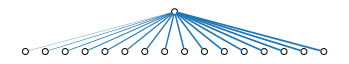

___________________________________________________________


Node 5  -- Mean Weight (standardized):  1.1163243474688083   -  ( Total weight:  17.861189559500932 )


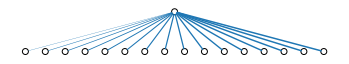

___________________________________________________________


Node 6  -- Mean Weight (standardized):  0.2609756158368076   -  ( Total weight:  4.175609853388922 )


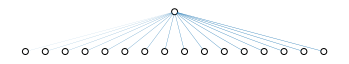

___________________________________________________________


Node 7  -- Mean Weight (standardized):  0.6966276547449797   -  ( Total weight:  11.146042475919675 )


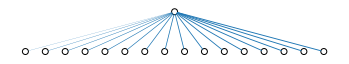

___________________________________________________________


Node 8  -- Mean Weight (standardized):  0.4258174313560086   -  ( Total weight:  6.813078901696137 )


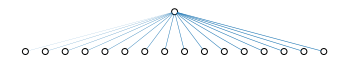

___________________________________________________________


Node 9  -- Mean Weight (standardized):  0.6191259187952645   -  ( Total weight:  9.906014700724231 )


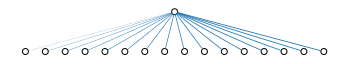

___________________________________________________________


Node 10  -- Mean Weight (standardized):  0.2848737609804926   -  ( Total weight:  4.557980175687882 )


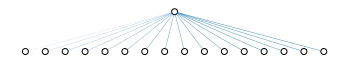

___________________________________________________________


Node 11  -- Mean Weight (standardized):  1.137913201938014   -  ( Total weight:  18.206611231008225 )


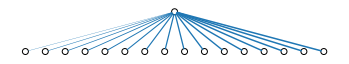

___________________________________________________________


Node 12  -- Mean Weight (standardized):  0.3925552895133643   -  ( Total weight:  6.280884632213829 )


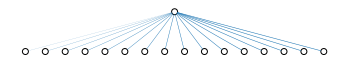

___________________________________________________________




In [180]:
i=0
grandTotal = 0
for i in range(12):
    
    largest = -1000

    network = NeuralNetwork()
    #weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
    wt = np.array([pArr[i]])
    
    tSum = 0
    j=0
    for j in range(16):
        
        tSum = tSum + wt[0,j]
        
        if wt[0,j] > largest:
            largest = wt[0,j]
   
    if tSum < 0:
        tSum = tSum * -1
    
    newSum = tSum / 16
    
    
    
    print("Node", i+1, " -- Mean Weight (standardized): ", newSum,"  -  ( Total weight: ", tSum,")" )
    network.add_layer(16, wt)
    network.add_layer(1)
    network.draw()
    print("___________________________________________________________\n\n")
    
    
    

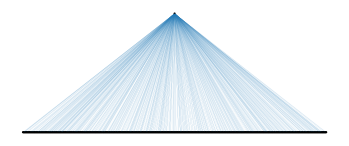

In [228]:
w8 = model.get_weights()[6]

w8_1 = w8[0:63]
w8_2 = w8[63:127]
w8_3 = w8[128:191]
w8_4 = w8[192:255]
w8_5 = w8[256:319]
w8_6 = w8[320:383]
w8_7 = w8[384:447]
w8_8 = w8[448:512]


if __name__ == "__main__":
    vertical_distance_between_layers = 50
    horizontal_distance_between_neurons = .25
    neuron_radius = .25
    number_of_neurons_in_widest_layer = 512
    network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
    weights1 = np.array([w8])
    network.add_layer(512, weights1)
    network.add_layer(1)
    network.draw()

512-to-1 weights to output of CNN
Nodes 1-64


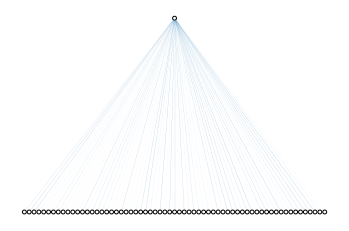

Nodes 65-128


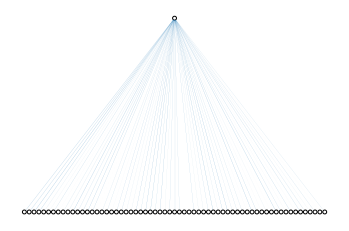

Nodes 129-192


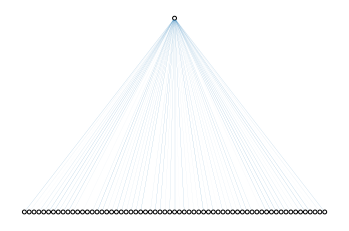

Nodes 193-256


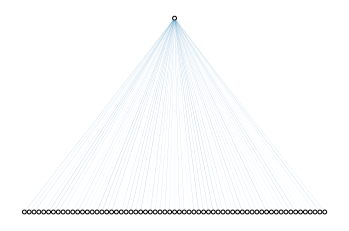

Nodes 257-320


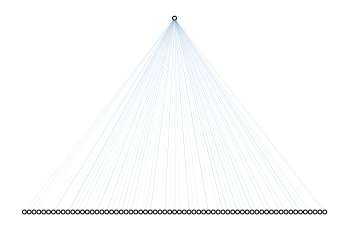

Nodes 321-384


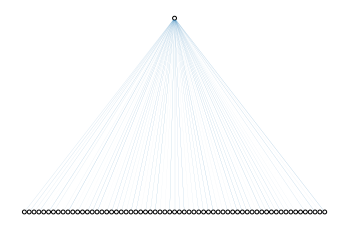

Nodes 385-447


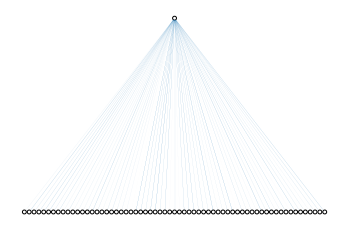

Nodes 448-512


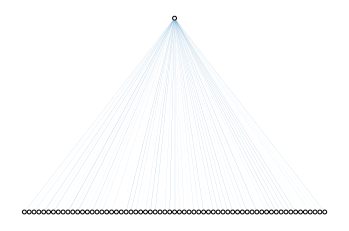

In [233]:
vertical_distance_between_layers = 200
horizontal_distance_between_neurons = 5
neuron_radius = 2
number_of_neurons_in_widest_layer = 512


print("512-to-1 weights to output of CNN")
print("Nodes 1-64")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_1])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()
print("Nodes 65-128")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_2])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()
print("Nodes 129-192")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_3])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()
print("Nodes 193-256")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_4])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()

print("Nodes 257-320")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_5])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()

print("Nodes 321-384")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_6])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()

print("Nodes 385-447")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_7])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()

print("Nodes 448-512")
network = NeuralNetwork()
    # weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([w8_8])
network.add_layer(63, weights1)
network.add_layer(1)
network.draw()